## 🏃 Physical Activity Prediction

Given *ECG data from subjects performing physical activities*, let's try to predict which **activity** is being performed by a given subject. 

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/gaurav2022/mobile-health

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv("mhealth_raw_data.csv")
data

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


### Preprocessing

In [4]:
df = data.copy()
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [5]:
# Drop subject column
df = df.drop('subject', axis=1)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0


In [7]:
df['Activity'].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [8]:
# Sample 200 examples from each class
samples = []
for category in df['Activity'].unique():
    category_slice = df.query("Activity == @category")
    samples.append(category_slice.sample(2000, random_state=1))
df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,1.13050,-10.6100,1.41830,0.447120,-0.83677,-0.56385,1.4346,-5.5331,5.69210,0.454900,-1.11910,0.15948,9
1,1.92980,-9.6366,0.69372,0.703150,-0.60976,0.16699,-1.2440,-14.8960,-0.56770,0.456860,-0.92608,0.60560,6
2,-1.12050,-9.5659,0.83342,0.057514,-0.87992,-0.63458,-2.9132,-6.1883,0.16975,0.223530,-1.07190,-0.23276,6
3,-1.03200,-9.8490,1.23680,-0.682750,-0.72233,-0.34185,-1.4491,-8.3957,2.43440,-0.390200,-0.96509,-0.34052,6
4,1.12280,-9.8073,1.44790,0.027829,-0.84991,-0.61690,-3.2816,-9.1822,1.78050,0.215690,-1.06980,-0.24138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0.15702,-9.8842,-0.30514,-0.575140,-0.82927,-0.46562,-1.7346,-7.4536,2.63770,-0.033333,-1.07600,-0.35776,6
25996,3.11680,-11.0240,-1.38460,-0.115030,-0.80863,-0.55796,-2.7360,-7.5495,5.04960,-0.296080,-1.04720,0.27371,9
25997,2.93400,-9.2730,-0.56973,0.684600,-0.64353,-0.71709,-1.6527,-7.1287,6.13320,0.331370,-0.85216,0.46767,2
25998,0.37995,-9.8052,1.65940,-0.586270,-0.82739,-0.22200,-6.1841,-9.3973,9.26970,-0.660780,-0.92608,-0.10345,7


In [9]:
df['Activity'].value_counts()

Activity
9     2000
6     2000
1     2000
12    2000
4     2000
7     2000
10    2000
8     2000
2     2000
11    2000
3     2000
0     2000
5     2000
Name: count, dtype: int64

In [10]:
# Split df into X and y
y = df['Activity']
X = df.drop("Activity", axis=1)

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
X_train

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
11053,2.57620,-9.01420,-2.41450,-0.617810,-0.85741,0.202360,-0.885920,-7.8818,0.82466,-0.94510,-0.50103,-0.26078
12600,1.79850,-9.41710,-5.07790,0.502780,0.02439,-0.636540,-3.494200,-14.7460,2.38770,0.50196,-0.76181,0.41379
7364,-1.54860,-10.81600,-1.38960,0.025974,-0.83490,0.387030,3.142000,-6.8279,6.21070,0.62745,-0.32854,0.96336
4806,0.36771,-11.02800,-0.78729,0.564010,-0.74672,0.182710,-4.096100,-8.9282,1.17860,-0.67059,-0.65092,0.63147
19271,1.57570,-9.76420,-1.17040,0.675320,-0.69231,-0.001965,-2.871700,-5.2320,0.80090,-0.26275,-0.78234,0.80172
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.90563,-9.85020,1.12070,-0.567720,-0.76923,0.337920,-2.730100,-9.3422,0.78289,-0.81373,-0.71458,-0.17888
17289,-0.90689,-9.42630,1.92590,-0.675320,-0.73546,-0.280940,-0.051845,-9.7037,1.62940,-0.19412,-0.95072,-0.50216
5192,2.43560,0.69966,9.56980,0.441560,0.95497,0.058939,-9.618900,-0.1532,1.67980,-0.46863,0.83984,0.68750
12172,1.55460,-8.58630,-5.16380,0.593690,-0.75422,-0.182710,2.592100,-4.9077,7.23380,0.84314,-0.22587,0.79526


In [12]:
y_train

11053    5
12600    5
7364     9
4806     4
19271    8
        ..
10955    1
17289    6
5192     3
12172    9
235      2
Name: Activity, Length: 18200, dtype: int64

In [13]:
X_train.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
count,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000,18200.000000
mean,1.741971,-9.047803,-0.902464,0.082713,-0.561531,-0.137656,-3.499552,-5.736207,2.258049,-0.233920,-0.413153,0.359414
std,4.458752,5.353199,6.631528,0.465254,0.419986,0.553072,6.080403,6.562773,4.219613,0.538074,0.546816,0.528948
min,-22.116000,-19.600000,-19.365000,-1.706900,-3.123800,-2.391000,-22.085000,-18.962000,-18.229000,-1.917600,-2.127300,-1.521600
25%,0.089995,-10.147000,-3.780475,-0.371060,-0.810510,-0.589390,-5.199600,-9.552000,0.025408,-0.694120,-0.837780,-0.075970
50%,1.360700,-9.597100,0.230430,0.174400,-0.688560,-0.125740,-2.530550,-7.603700,1.762500,-0.340200,-0.591380,0.426720
75%,2.915450,-7.457675,1.758100,0.480520,-0.493430,0.343810,-0.512635,-1.894125,5.122850,0.196080,-0.047228,0.836210
max,20.014000,21.050000,24.828000,1.705000,1.686700,1.581500,19.772000,21.859000,24.586000,1.307800,1.193000,2.060300


In [14]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [15]:
X_train.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
count,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04,1.820000e+04
mean,1.327388e-17,2.223374e-16,-6.051325e-18,-1.210265e-17,-2.527892e-17,-1.991081e-17,-3.337989e-17,1.410349e-16,1.873959e-17,1.581153e-17,1.163416e-16,1.054102e-16
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-5.350965e+00,-1.971249e+00,-2.784131e+00,-3.846634e+00,-6.101016e+00,-4.074344e+00,-3.056698e+00,-2.015330e+00,-4.855330e+00,-3.129171e+00,-3.134864e+00,-3.556237e+00
25%,-3.705121e-01,-2.053402e-01,-4.340010e-01,-9.753490e-01,-5.928435e-01,-8.167946e-01,-2.796024e-01,-5.814459e-01,-5.291250e-01,-8.552955e-01,-7.765657e-01,-8.231350e-01
50%,-8.551307e-02,-1.026137e-01,1.708393e-01,1.970752e-01,-3.024685e-01,2.154600e-02,1.593691e-01,-2.845663e-01,-1.174427e-01,-1.975243e-01,-3.259447e-01,1.272479e-01
75%,2.631927e-01,2.970508e-01,4.012103e-01,8.550565e-01,1.621554e-01,8.705546e-01,4.912501e-01,5.854519e-01,6.789437e-01,7.991686e-01,6.692107e-01,9.014277e-01
max,4.098126e+00,5.622550e+00,3.880127e+00,3.486982e+00,5.353260e+00,3.108462e+00,3.827409e+00,4.204925e+00,5.291615e+00,2.865335e+00,2.937363e+00,3.215687e+00


### Training/Results

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(acc * 100))

Test Accuracy: 55.40%


#### Confusion Matrix

In [18]:
activity_labels = {
0: "None",
1: "Standing still (1 min)",
2: "Sitting and relaxing (1 min)",
3: "Lying down (1 min)",
4: "Walking (1 min)",
5: "Climbing stairs (1 min)",
6: "Waist bends forward (20x)",
7: "Frontal elevation of arms (20x)",
8: "Knees bending (crouching) (20x)",
9: "Cycling (1 min)",
10: "Jogging (1 min)",
11: "Running (1 min)",
12: "Jump front & back (20x)"
}

In [19]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=list(range(13)))
clr = classification_report(y_test, y_pred, labels=list(range(13)), target_names=activity_labels.values())

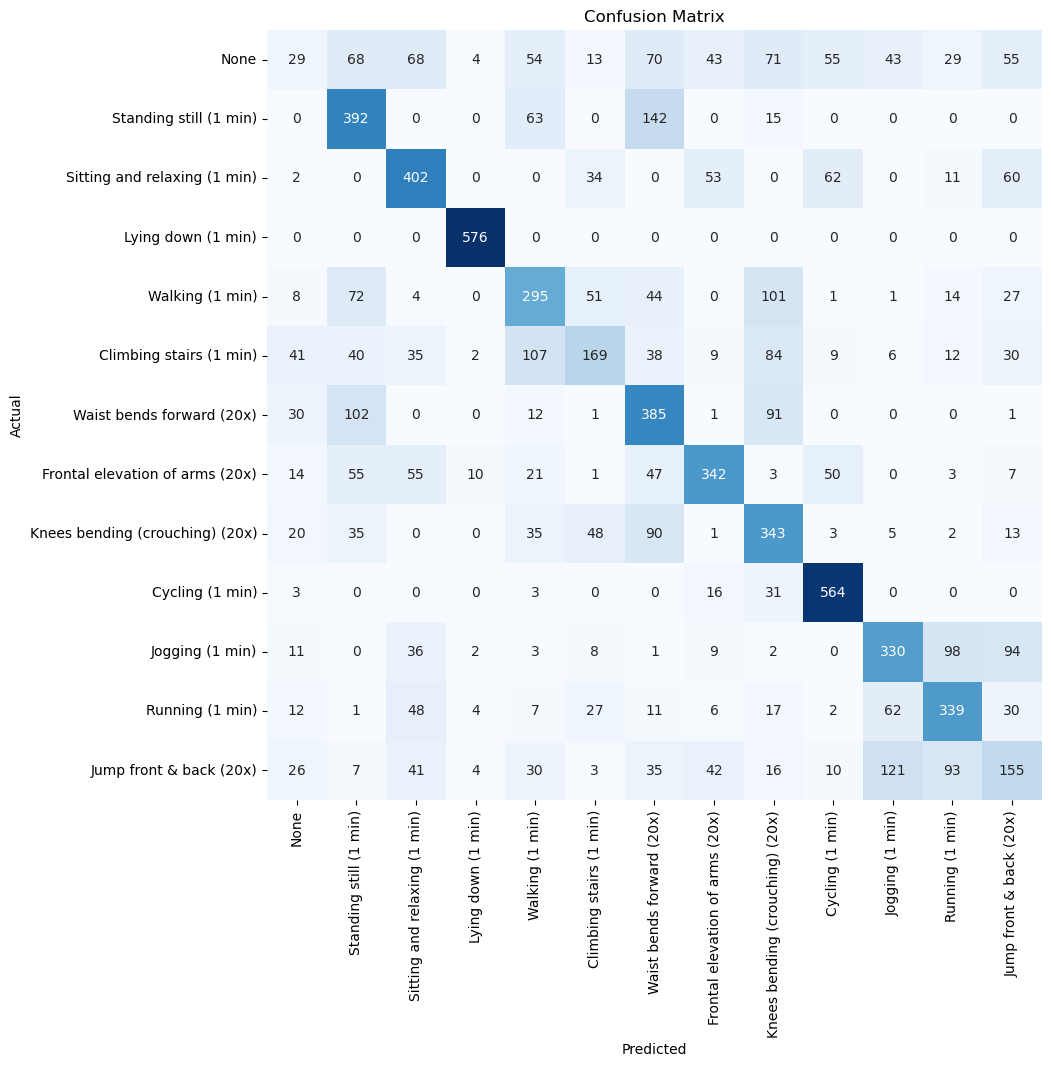

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap="Blues", cbar=False)
plt.xticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=90)
plt.yticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
print("Classification Report:\n----------------------------------\n", clr)

Classification Report:
----------------------------------
                                  precision    recall  f1-score   support

                           None       0.15      0.05      0.07       602
         Standing still (1 min)       0.51      0.64      0.57       612
   Sitting and relaxing (1 min)       0.58      0.64      0.61       624
             Lying down (1 min)       0.96      1.00      0.98       576
                Walking (1 min)       0.47      0.48      0.47       618
        Climbing stairs (1 min)       0.48      0.29      0.36       582
      Waist bends forward (20x)       0.45      0.62      0.52       623
Frontal elevation of arms (20x)       0.66      0.56      0.61       608
Knees bending (crouching) (20x)       0.44      0.58      0.50       595
                Cycling (1 min)       0.75      0.91      0.82       617
                Jogging (1 min)       0.58      0.56      0.57       594
                Running (1 min)       0.56      0.60      0.58  